In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno


plt.rcParams['figure.dpi'] = 140
df = pd.read_excel("/content/suicide-blasts-final.xlsx")










Decision Tree on training set: 0.20
Decision Tree on test set: 0.18


In [4]:
#whats in the head of the data set
df.head(10)

,S#,Date,Year,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,...,Targeted Sect if any,Killed Min,Killed,Injured Min,Injured,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,2002,25 safar 1423 A.H,Working Day,NaN,07:45:00,Karachi,24.9918,66.9911,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00,Karachi,24.9918,66.9911,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta\n2.Civil Hospital 3. Boland Medic...,33.120,91.616
5,6,Thursday-December 25-2003,2003,2 Thw al-Qi`dah 1424 A.H.,Holiday,Christmas/birthday of Quaid-e-Azam,1:40:00 PM/1:42:00 PM,Rawalpindi,33.6058,73.0437,...,NaN,16.0,18.0,NaN,50,2.0,30kg in each car,1.District headquarters \nHospital,9.445,49.001
6,7,Saturday-February 28-2004,2004,8 MuHarram 1425 A.H,Working Day,NaN,NaN,Rawalpindi,33.6058,73.0437,...,shiite,NaN,1.0,3.0,4,1.0,NaN,NaN,15.275,59.495
7,8,Friday-May 7-2004,2004,18 Raby` al-awal 1425 A.H,Working Day,NaN,1:20:00/1:17:00 PM,Karachi,24.9918,66.9911,...,shiite,14.0,15.0,96.0,200,1.0,2kg,Civil hospital,33.860,92.948
8,9,Monday-May 31-2004,2004,NaN,Working Day,NaN,evening,Karachi,24.9918,66.9911,...,Shiite,16.0,18.0,NaN,35,1.0,NaN,Civil hospital-Liaquat National hospital-Jinna...,31.605,88.889
9,10,Thursday-June 3-2004,2004,15 Raby` al-THaany 1425 A.H,Working Day,NaN,NaN,North waziristan,32.9746,70.1456,...,NaN,NaN,2.0,NaN,2,1.0,NaN,NaN,27.180,80.924


In [2]:
#describing the data 
df.describe()

,S#,Year,Latitude,Killed Min,Killed,Injured Min,No. of Suicide Blasts,Temperature(C),Temperature(F)
count,496.000000,496.000000,493.000000,350.000000,480.000000,365.000000,496.000000,491.000000,489.000000
mean,248.500000,2010.312500,32.614705,14.725714,15.206250,31.397260,1.096774,21.111599,69.972579
std,143.327132,3.189174,2.475917,17.600930,20.270436,38.603842,0.363359,8.369068,15.069622
min,1.000000,1995.000000,24.879503,0.000000,0.000000,0.000000,1.000000,-2.370000,27.734000
25%,124.750000,2008.000000,31.823800,3.000000,3.000000,7.000000,1.000000,14.690000,58.370000
50%,248.500000,2010.000000,33.583300,8.000000,8.000000,20.000000,1.000000,21.405000,70.529000
75%,372.250000,2013.000000,34.004300,20.000000,18.250000,40.000000,1.000000,28.115000,82.499000
max,496.000000,2017.000000,35.383300,125.000000,148.000000,320.000000,4.000000,44.000000,111.000000


In [3]:
#information about the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   S#                       496 non-null    int64  
 1   Date                     496 non-null    object 
 2   Year                     496 non-null    int64  
 3   Islamic Date             342 non-null    object 
 4   Blast Day Type           486 non-null    object 
 5   Holiday Type             72 non-null     object 
 6   Time                     285 non-null    object 
 7   City                     496 non-null    object 
 8   Latitude                 493 non-null    float64
 9   Longitude                493 non-null    object 
 10  Province                 496 non-null    object 
 11  Location                 493 non-null    object 
 12  Location Category        460 non-null    object 
 13  Location Sensitivity     460 non-null    object 
 14  Open/Closed Space        4

In [ ]:
#decison tree related to explosive weight and open and closed spaces:
#print(df['Explosive Weight (max)'])
d = {'2.5': 0, '100': 1, '1000': 2}
df['Explosive Weight (max)'] = df['Explosive Weight (max)'].map(d)
d = {'NA': 1, 'NO': 0}
df['Open/Closed Space'] = df['Open/Closed Space'].map(d)
features = ['Explosive Weight (max)','Open/Closed Space']

l = df[features]

#y = df['Injured']

print(X)
#print(y)



0      2.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
491    1.0
492    1.0
493    1.0
494    1.0
495    1.0
Name: No. of Suicide Blasts, Length: 496, dtype: float64


ValueError: ignored

In [ ]:
#f = ['No. of Suicide Blasts']
X = df['No. of Suicide Blasts']
y = df['Year']

NameError: ignored

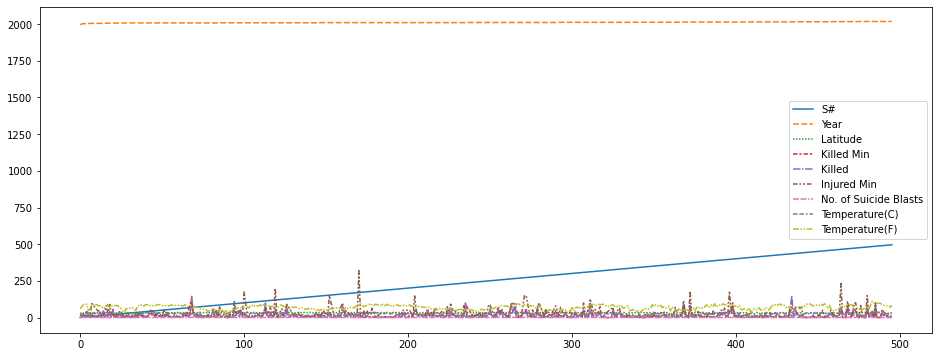

In [5]:
#data visualization using seaborn--------------------------------------------------------------------------------------------
# ------------------------------------- graph #1---------------------
#plotting the seaborn first graph
plt.figure(figsize=(16,6))
sns.lineplot(data=df)

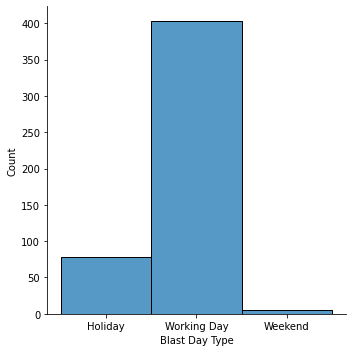

In [8]:
#sns.displot(df['killed'])


sns.displot(df['Blast Day Type'])

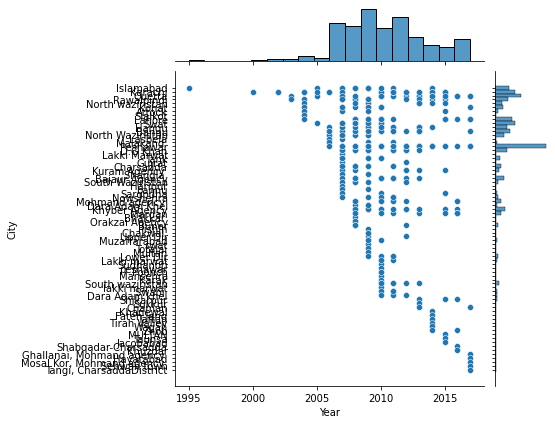

In [9]:
#------------------------------------ graph #3 ----------------





sns.jointplot(x ='Year', y ='City', data = df)




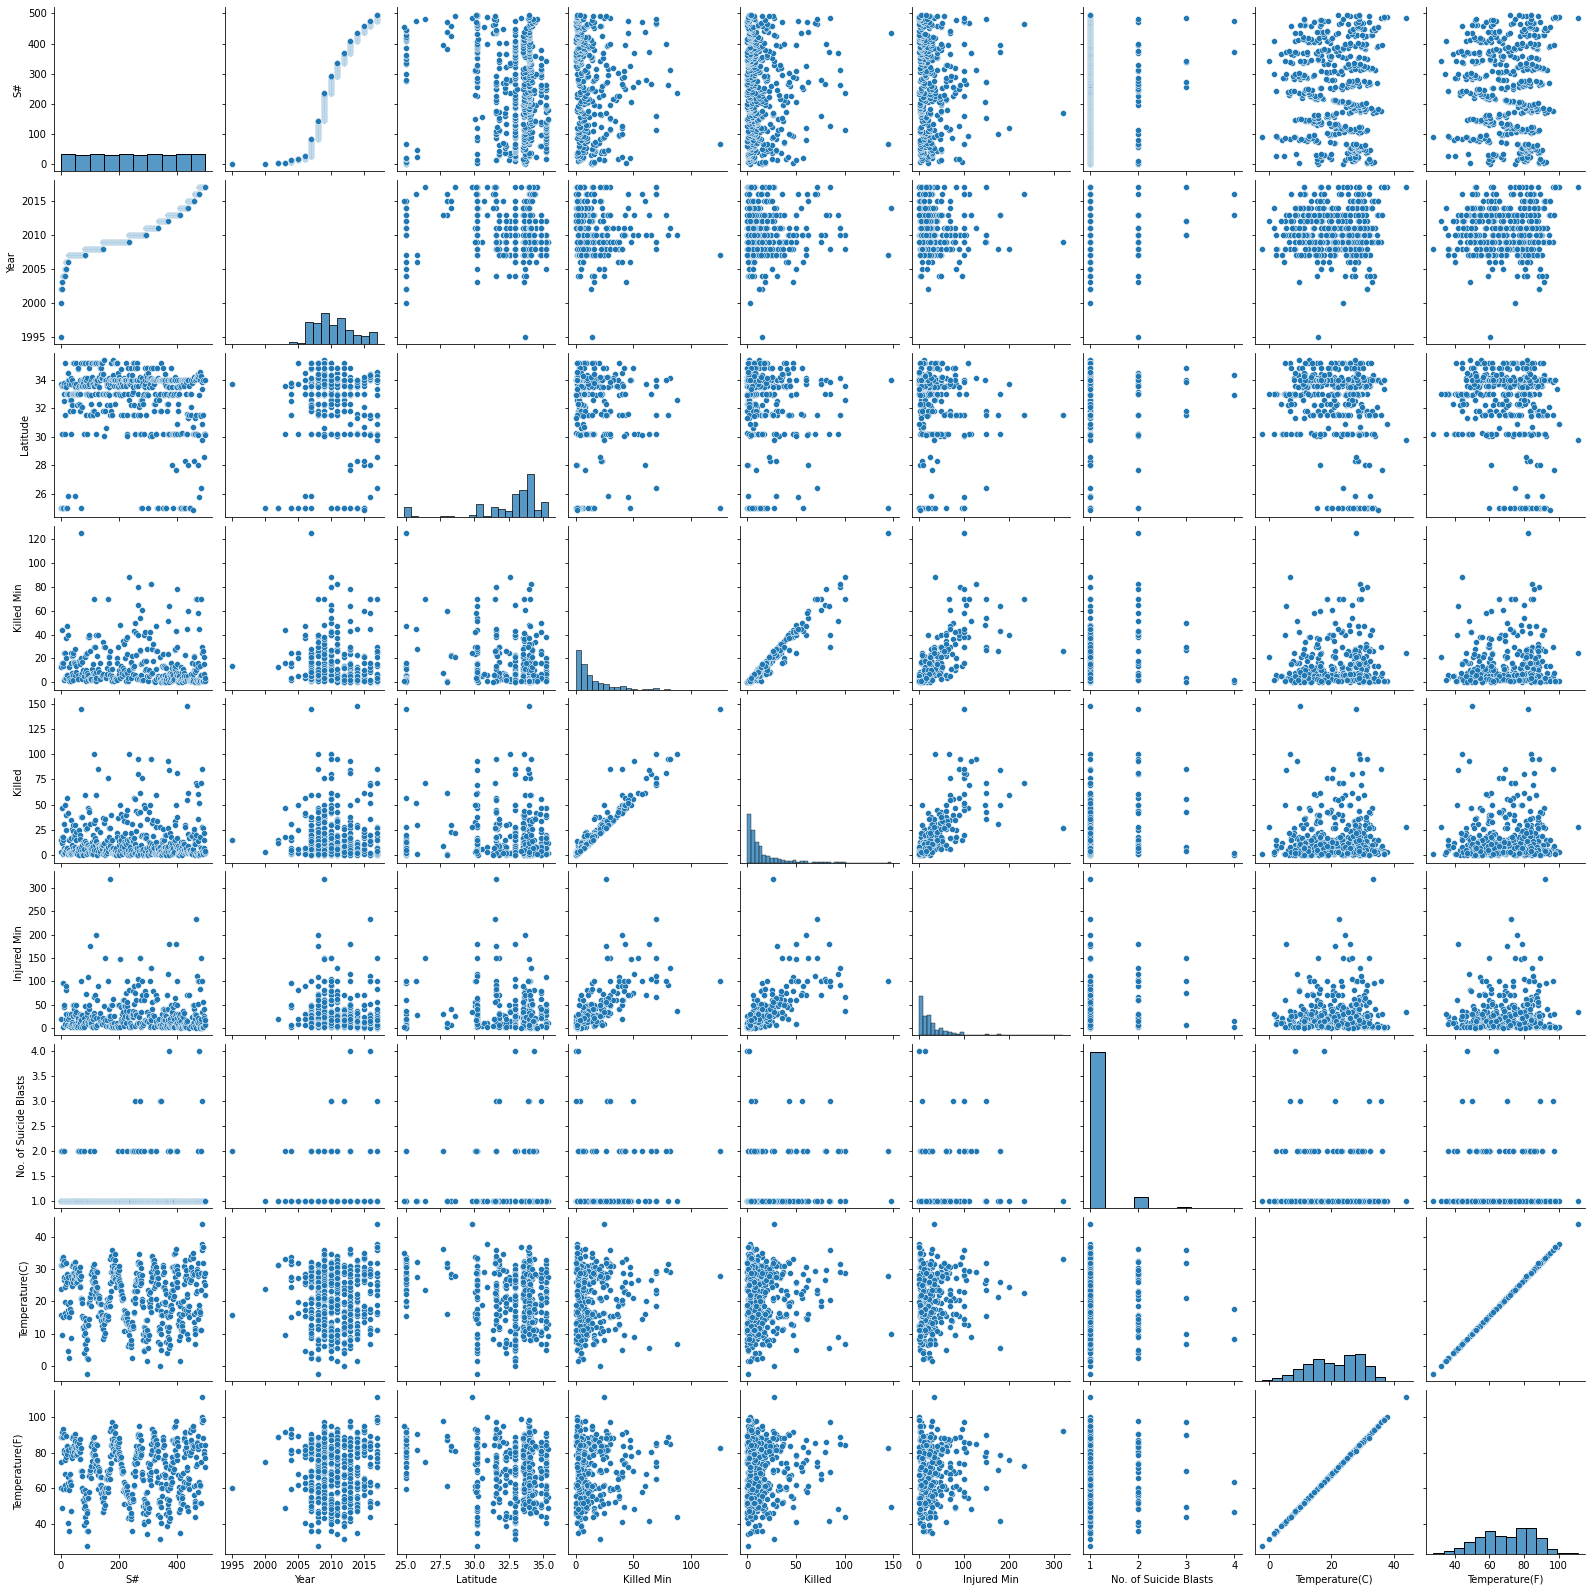

In [10]:
#-------------------------------------  graph #4 -----------------

sns.pairplot(df)
tips_df = sns.load_dataset('tips')


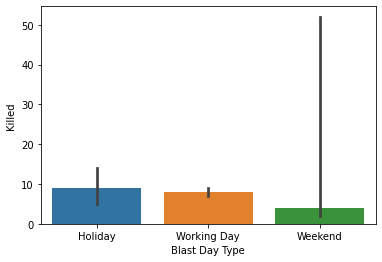

In [11]:
#------------------------------------- graph #5  ------------------
sns.barplot(x='Blast Day Type',y='Killed ',data=df, estimator=np.median)

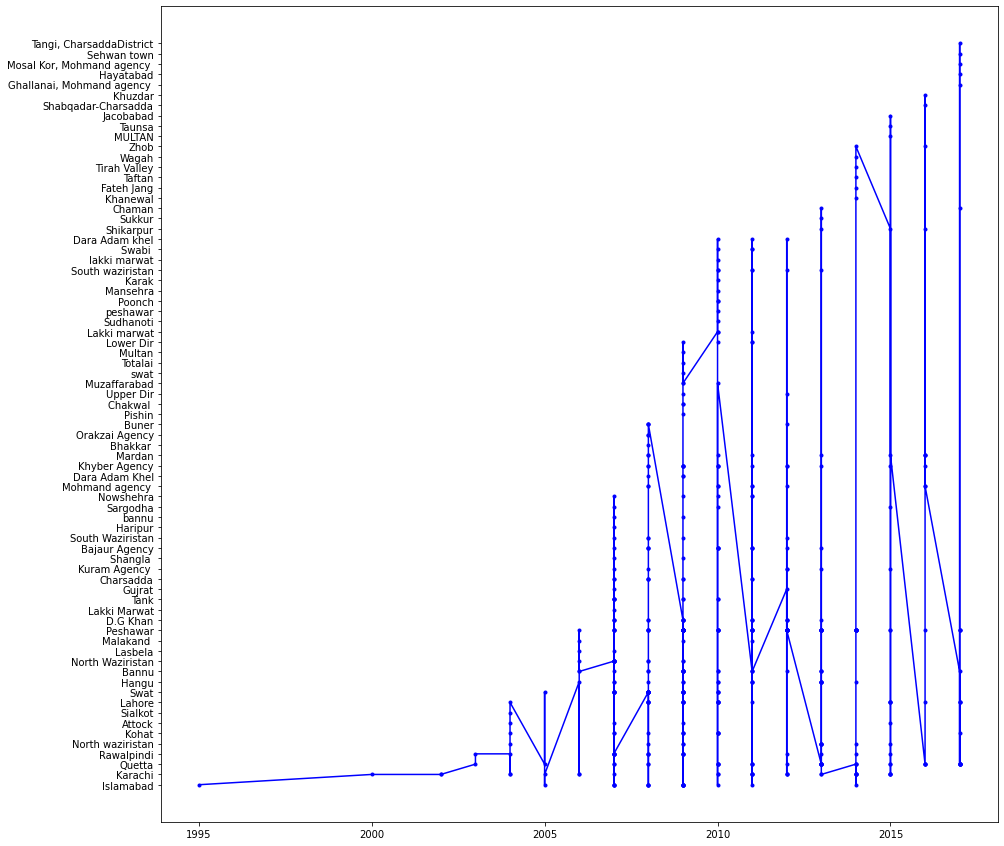

In [12]:

#----------------------------------------matplot---------------------
#-------------------------------------- graph #1 matplot-------------

plt.figure(figsize=(15,15))
plt.plot(df.Year, df.City, 'b.-', label='cities with blasts over time')


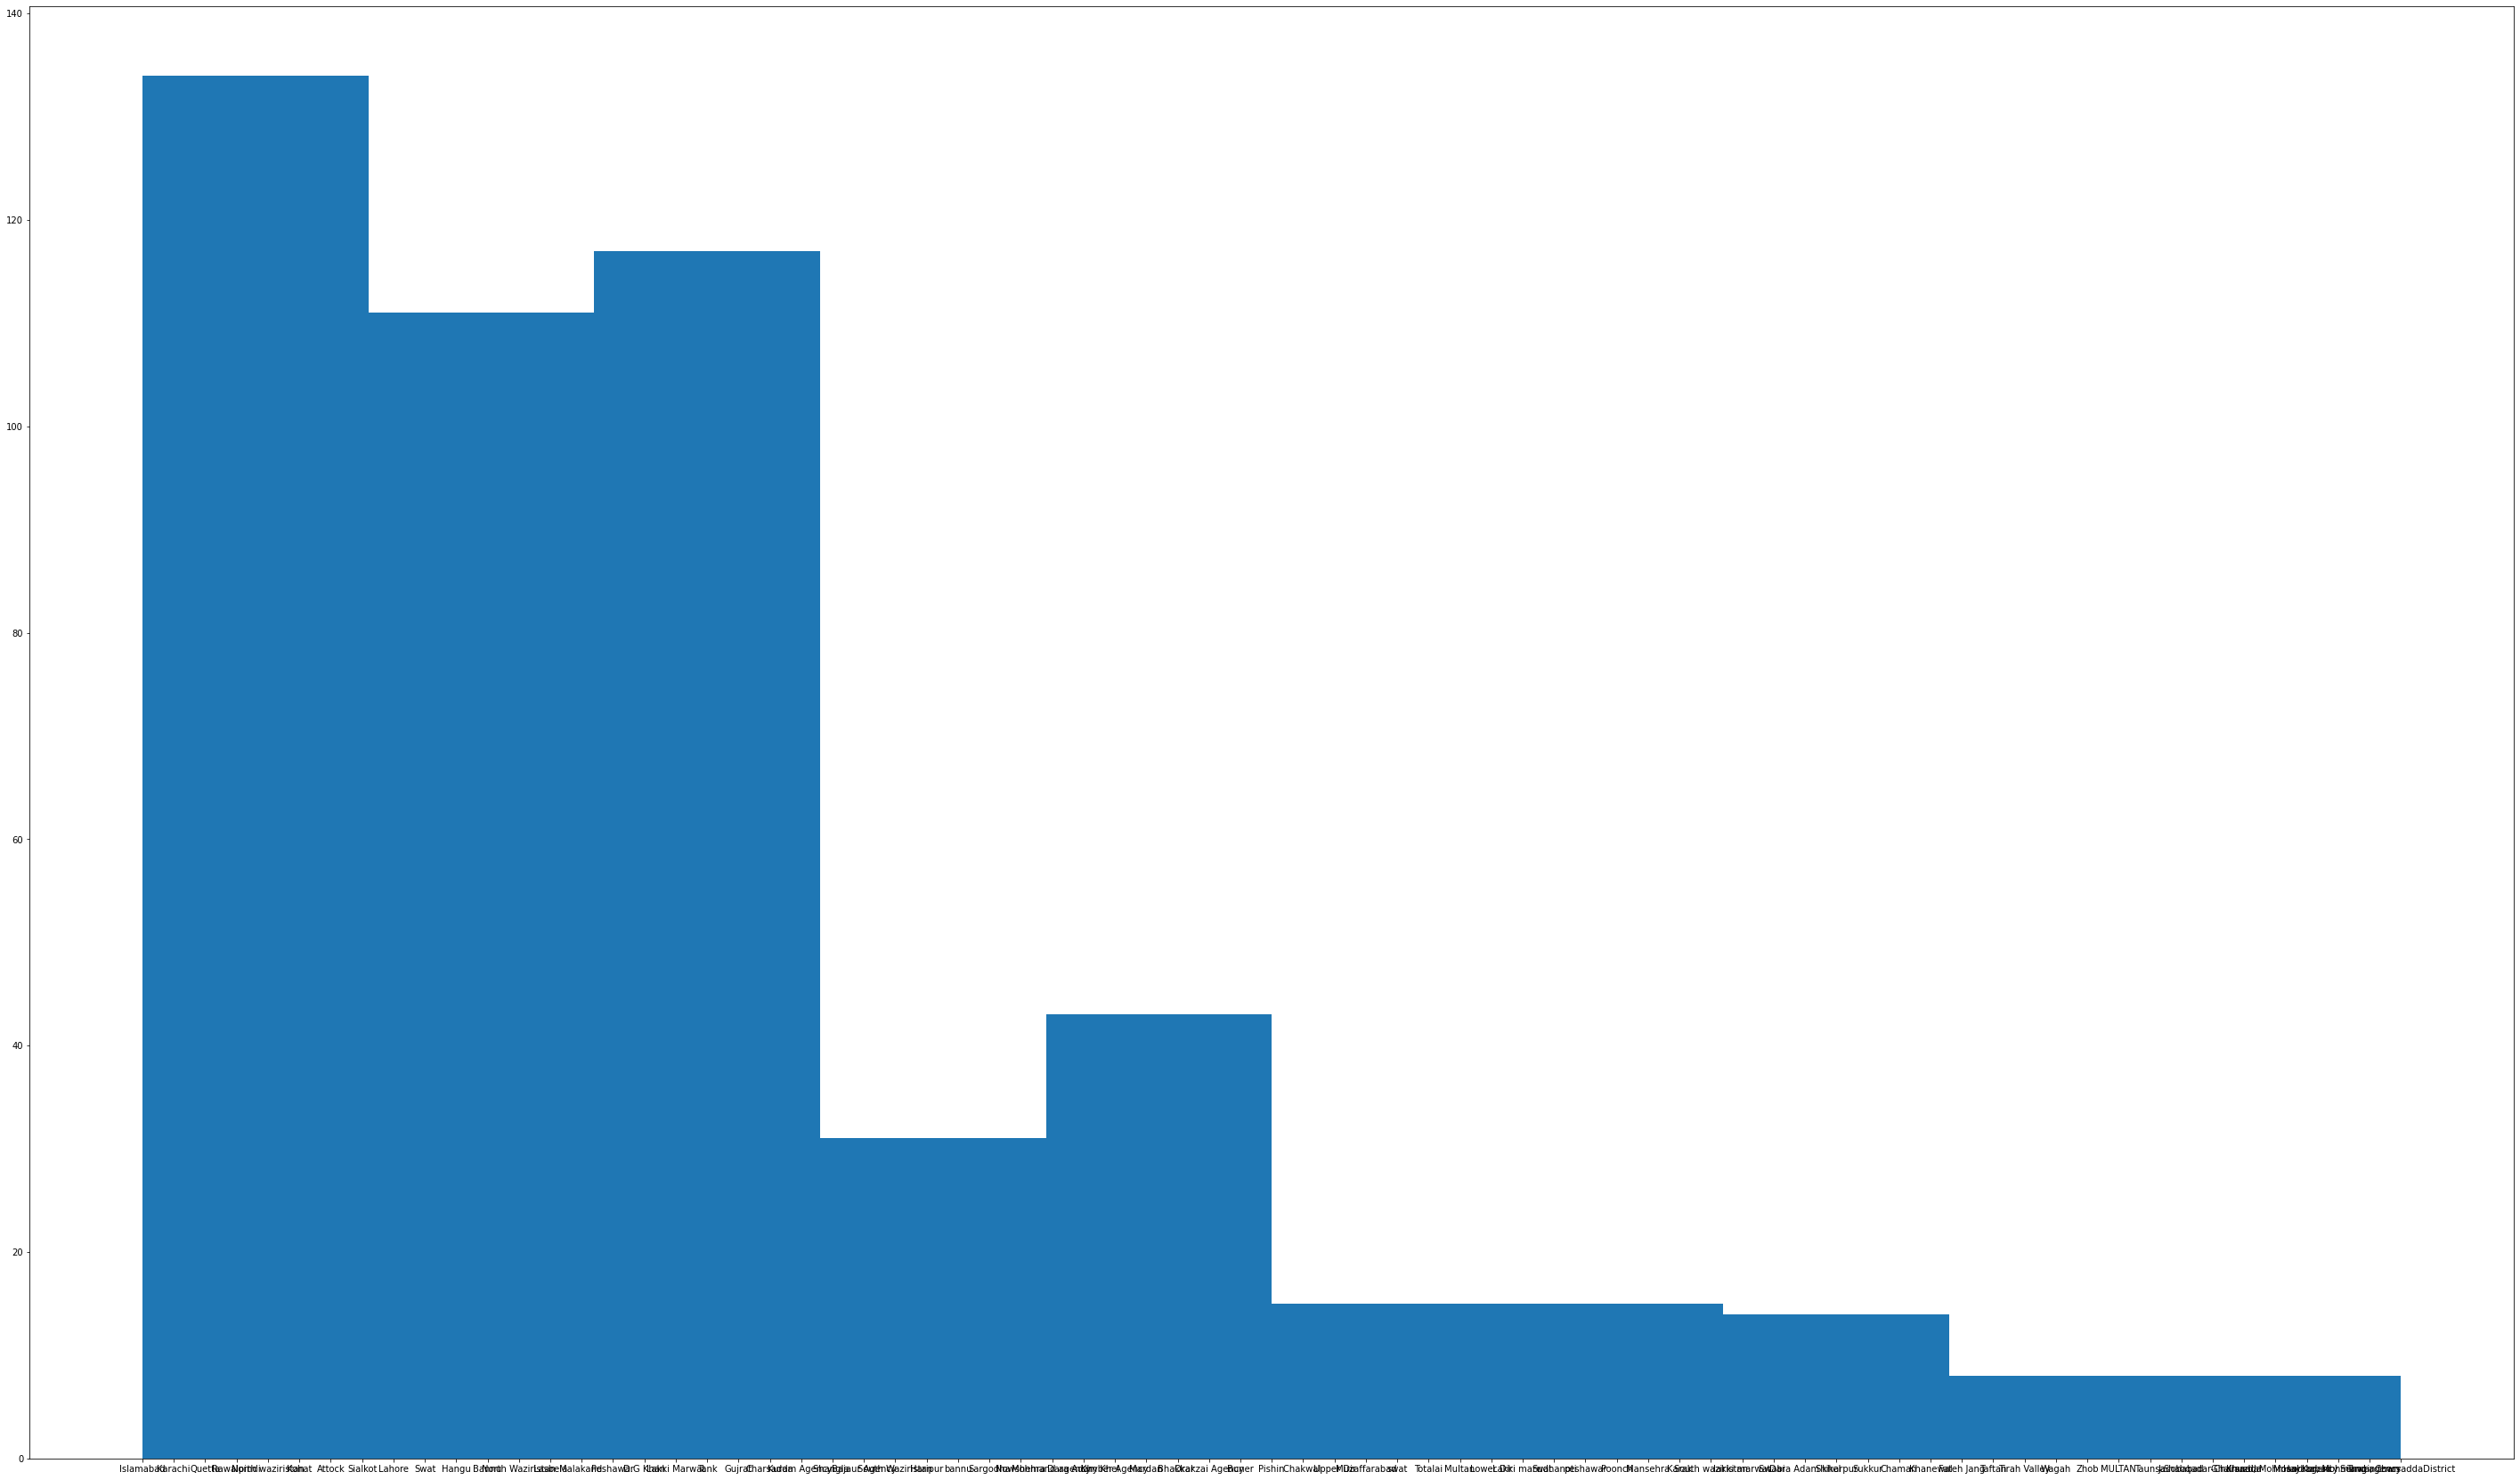

,S#,Date,Year,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,...,Targeted Sect if any,Killed Min,Killed,Injured Min,Injured,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
0,1,Sunday-November 19-1995,1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,NaN,Islamabad,33.7180,73.0718,...,NaN,14.0,15.0,NaN,60,2.0,NaN,NaN,15.835,60.503
1,2,Monday-November 6-2000,2000,10 SHa`baan 1421 A.H,Working Day,NaN,NaN,Karachi,24.9918,66.9911,...,NaN,NaN,3.0,NaN,3,1.0,NaN,NaN,23.770,74.786
2,3,Wednesday-May 8-2002,2002,25 safar 1423 A.H,Working Day,NaN,07:45:00,Karachi,24.9918,66.9911,...,Christian,13.0,15.0,20.0,40,1.0,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil ...,31.460,88.628
3,4,Friday-June 14-2002,2002,3 Raby` al-THaany 1423 A.H,Working Day,NaN,11:10:00,Karachi,24.9918,66.9911,...,Christian,NaN,12.0,NaN,51,1.0,NaN,NaN,31.430,88.574
4,5,Friday-July 4-2003,2003,4 Jumaada al-awal 1424 A.H,Working Day,NaN,NaN,Quetta,30.2095,67.0182,...,Shiite,44.0,47.0,NaN,65,1.0,NaN,1.CMH Quetta\n2.Civil Hospital 3. Boland Medic...,33.120,91.616


In [13]:
#_______________________________________________ graph #2 histogram 
plt.figure(figsize=(50,30))
plt.hist(df.City)
plt.show()
df.head(5)

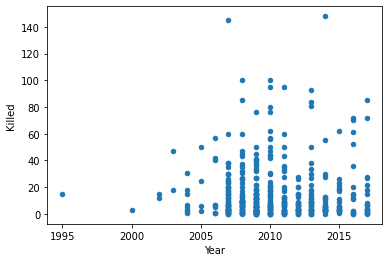

In [14]:
#------------------------------------ graph #3 matplot 


df.plot(kind='scatter',x='Year',y='Killed ') # scatter plot

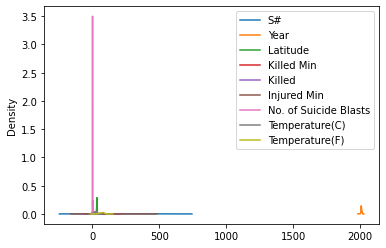

In [15]:
#---------------------- graph #4 density of the grap
df.plot(kind='density')



<Figure size 7200x7200 with 0 Axes>

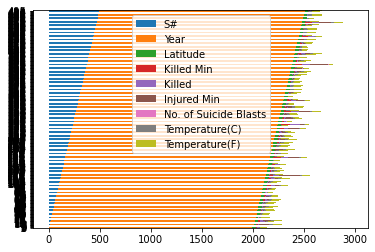

In [16]:
#----------------------------------- graph #5 matplot
plt.figure(figsize=(100,100))
df.plot(kind='barh', stacked=True);

#-------------------------------------------------------------------------------------
#this column have some missing data 

In [17]:
#training the dataset  decision tree from 8 of the machine learnig models:
 
df['No. of Suicide Blasts'] = df['No. of Suicide Blasts'].fillna(df['No. of Suicide Blasts'].mode()[0])


usman = [  'No. of Suicide Blasts']
X = df[usman]
y = df['Year']



from sklearn.model_selection import train_test_split
#X = df.Killed
#y = df.Injured



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#decision tree accuracy calculation
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Decision Tree on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Decision Tree on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Decision Tree on training set: 0.20
Decision Tree on test set: 0.18


In [23]:
#2 froo machine learning models Random Forest Model
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy rate from the given trained dataset:",metrics.accuracy_score(y_test, y_pred))

Accuracy rate from the given trained dataset: 0.19


In [24]:
#6 ________________________SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.20
Accuracy of SVM classifier on test set: 0.19


In [22]:
# 3 applying the machine leanring model
#---------------------------------------------- Regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [20]:
#4
#------------------------------------------- LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.20
Accuracy of Logistic regression classifier on test set: 0.17


In [21]:
#5
#---------------------------------------------Confussion Matrix
data = {'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0],
        'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

    y_Actual  y_Predicted
0          1            1
1          0            1
2          0            0
3          1            1
4          0            0
5          1            1
6          0            1
7          0            0
8          1            1
9          0            0
10         1            0
11         0            0
